### 1. SVM的概念

支撑向量机（support vector machine）既可以做回归，也可以做分类。SVM尝试寻找到一个最优的决策边界，距离两个类别的最近的样本最远。如图所示，最近的决定的样本点就是支撑向量。SVM要做的事情就是最大化图中的margin。

![](https://www.saedsayad.com/images/SVM_2.png)

已知点(x,y)到直线Ax + by + c = 0的距离为：

\begin{equation}
d = \frac{|Ax + By + C|}{\sqrt{A^2+B^2}}
\end{equation}

如果将线性函数放到n维向量中为：

\begin{equation}
w^Tx + b = 0
\end{equation}

可求得点(x,y)到该直线的距离为：

\begin{equation}
d = \frac{|w^Tx + b|}{\|w\|}
\end{equation}

这里 $\|w\|$为：

\begin{equation}
\|w\| = \sqrt{w_1^2 + w_2^2 + w_3^2 + ... + w_n^2}
\end{equation}

假如距离决策边界最近的点到决策边界的距离为d, 那么对于决策边界上下其他的点，我们可以知道某一点到决策边界的距离是大于等于d的，即（假如决策边界上面的为1，下面的为-1）：

![](https://www.saedsayad.com/images/SVM_optimize.png)

公式为：

\begin{equation}
y=\left\{
             \begin{array}{svm}
             \frac{|w^Tx\left(i\right) + b|}{\|w\|} \ge d, & \forall y = 1 \\
             \\
             \frac{|w^Tx\left(i\right) + b|}{\|w\|} \le d , & \forall y = -1 \\ 
             \end{array}
\right.
\end{equation}

我们进一步可得到：

\begin{equation}
y=\left\{
             \begin{array}{svm}
             \frac{|w^Tx^\left(i\right)  + b|}{\|w\|d} \ge 1, & \forall y = 1 \\
             \\
             \frac{|w^Tx^\left(i\right)  + b|}{\|w\|d} \le -1 , & \forall y = -1 \\ 
             \end{array}
\right.
\end{equation}

而式中的分母是个确定的数字，可得：

\begin{equation}
y=\left\{
             \begin{array}{svm}
             w_d^Tx^\left(i\right)  + b_d \ge 1,  & \forall y = 1 \\
             \\
             w_d^Tx^\left(i\right) + b_d \le 1, & \forall y = -1 \\ 
             \end{array}
\right.
\end{equation}

为了方便书写，可以直接写为（不过此处的$w$与开始时候的已经不同了）：

\begin{equation}
y=\left\{
             \begin{array}{svm}
             w^Tx^\left(i\right)  + b \ge 1, & \forall y = 1 \\
             \\
             w^Tx^\left(i\right) + b \le 1, & \forall y = -1 \\ 
             \end{array}
\right.
\end{equation}

这两次式子同样可以变为一个：

\begin{equation}
y^\left(i\right)\left(w^Tx^\left(i\right) + b \right) \ge 1
\end{equation}

对于任意支撑向量，我们需要最大化：
\begin{equation}
max\frac{|w^T+b|}{\|w\|}
\end{equation}

分子不是在边界上的一类就是另一类，即1或者-1，那么上式即可变为最大化：

\begin{equation}
max\frac{1}{\|w\|}
\end{equation}

即：

\begin{equation}
min\|w\|
\end{equation}

为了方便求导，我们一般是最小化平方：

\begin{equation}
min\frac{1}{2}\|w\|^2
\end{equation}

我们整体即可得到 (s.t. such that 在……条件下)：

\begin{equation}
min\frac{1}{2}\|w\|^2  \\
\\
s.t. y^\left(i\right)\left(w^Tx^\left(i\right) + b \right) \ge 1
\end{equation}

这是一个有条件的最优化问题，难度增大了许多，需要用拉普拉斯乘子法求解（待更新）。

---

### 2. Soft Margin SVM

上面提到的方法是Hard Margin SVM。但是存在一种这样的情况：
![](https://miro.medium.com/max/700/1*Z9HQRL4rTdubV2a0hLtCjA.png)

红色和绿色的线哪一个更好呢？有一个绿色的方块离红色方块很近，如果按照上面的hard margin的方法很有可能找到的决策边界是红色的线。但是这样的决策边界，泛化能力可能存在问题。大多数绿色的点离红点是比较远的，而因为一个点，对决策边界造成了很大的影响，这么的点很可能是一个离群点甚至是错误的点，并不能代表一般情况。而绿色的决策边界线，虽然将其中一个点进行了错误的分类，但是在真实情况下预测的时候，可能会更好，这样的决策边界泛化能力会更好。

或者更极端的情况下，绿色的点在红色点中间，这样的话，用上面的方法根本就不可分了。所以需要一个存在一定容错的SVM。

因此我们对上面的条件进行限定，让我们的模型对训练集中的极端数据不那么敏感(容忍一定的错误，但是这个错误一定要最小)：

![](https://miro.medium.com/max/700/1*M_3iYollNTlz0PVn5udCBQ.png)

\begin{equation}
min\frac{1}{2}\|w\|^2 + C\sum_{i=1}^{m}\zeta_i \\
\\
s.t. y^\left(i\right)\left(w^Tx^\left(i\right) + b \right) \ge 1 - \zeta_i \\
\zeta \ge 0
\end{equation}

上式即为L1正则。以下是L2正则：

\begin{equation}
min\frac{1}{2}\|w\|^2 + C\sum_{i=1}^{m}\zeta_i^2 \\
\\
s.t. y^\left(i\right)\left(w^Tx^\left(i\right) + b \right) \ge 1 - \zeta_i \\
\zeta \ge 0
\end{equation}



### 3. scikit learn中的SVM使用

在使用SVM之前，需要进行标准化。

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import datasets

In [130]:
warnings.filterwarnings('ignore')

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2,:2] 
y = y[y<2] # 用前两个feature，方便可视化


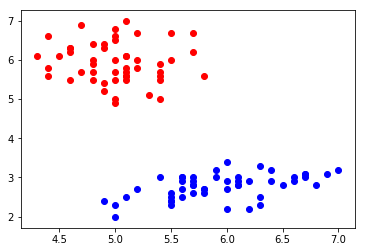

In [95]:
plt.scatter(X[y==0,0], X[y==1,0], color = 'red')
plt.scatter(X[y==1,0], X[y==1,1], color = 'blue')
plt.show()

In [99]:
from sklearn.preprocessing import StandardScaler

# 标准化
standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [100]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1e9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [101]:
# 决策边界函数
def plot_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Set3)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Greens)
    plt.show()

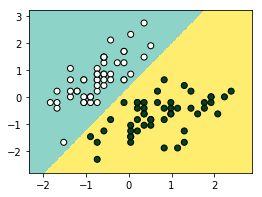

In [102]:
plot_boundary(svc, X_standard, y)

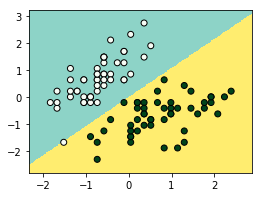

In [103]:
# 将C改小,容错空间越大，SVM更倾向于Soft Margin SVM （如图有个点被分错了）

svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

plot_boundary(svc2, X_standard, y)

In [136]:
X_train.shape

(90, 2)

In [106]:
# 可视化margin
def plot_svm_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Set3)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Greens)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    # 决策边界为 w0 * x1 + w1 * x1 + b = 0, 即 x1 = -w0/w1 * x0 - b/w1
    # 如果是上边界 就是w0 * x1 + w1 * x1 + b = 1
    
    plot_x = np.linspace(x_min, x_max, 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index =  (y_min <= up_y) & (up_y <= y_max)
    down_index = (y_min <= down_y) & (down_y <= y_max)
    
    plt.plot(plot_x[up_index],up_y[up_index], color = 'red')
    plt.plot(plot_x[down_index],down_y[down_index], color = 'red')
    
    plt.show()

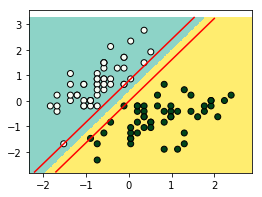

In [107]:
# Hard Margin SVM
plot_svm_boundary(svc, X_standard, y)

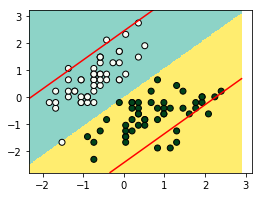

In [108]:
# Soft Margin SVM
plot_svm_boundary(svc2, X_standard, y)

### 4. SVM中使用多项式特征

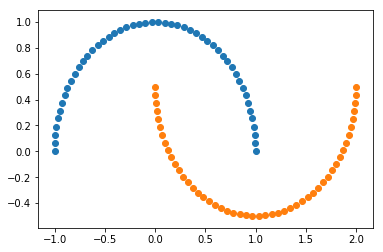

In [116]:
X, y = datasets.make_moons()
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

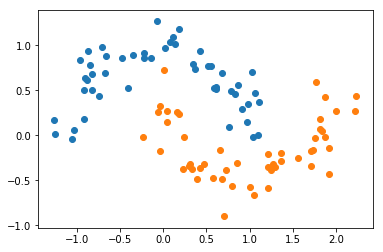

In [117]:
# 随机产生noise

X, y = datasets.make_moons(noise=0.15, random_state=1)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def PolynomialSCV(degree, C = 1.0):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('linearSVC', LinearSVC(C=C))
    ])
    

In [112]:
poly_svc = PolynomialSCV(degree=3)
poly_svc.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

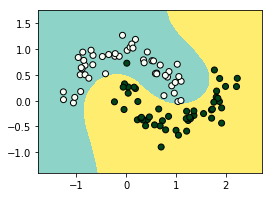

In [113]:
plot_boundary(poly_svc, X, y)

### 5. 多项式核函数SVM
其实scikit learn中可以直接使用多项式特征，这种方式被称为多项式核。

In [128]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree, C = 1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('kernelSVC', SVC(kernel='poly', degree=degree, C=C))
    ])   
    

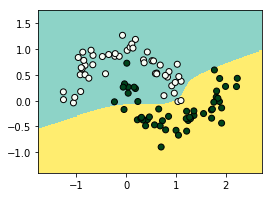

In [115]:
poly_kernel_svc = PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(X, y)

plot_boundary(poly_kernel_svc, X, y)

核函数是什么呢？

SVM算法本质就是求解以下函数：

\begin{equation}
min\frac{1}{2}\|w\|^2 + C\sum_{i=1}^{m}\zeta_i \\
\\
s.t. y^\left(i\right)\left(w^Tx^\left(i\right) + b \right) \ge 1 - \zeta_i \\
\zeta \ge 0
\end{equation}

上式可化为（拉格朗日乘子法求解）：

\begin{equation}
max\sum_{i=1}^{m}\alpha_i - \frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_i\alpha_jy_iy_jx_ix_j \\
s.t. 0 \le \alpha_i \le C \\
\sum_{i=1}^{m}\alpha_iy_i=0
\end{equation}

我们想通过某种方式，设置某个函数，对$x_ix_j$变换，即：

\begin{equation}
max\sum_{i=1}^{m}\alpha_i - \frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_i\alpha_jy_iy_jK\left(x_i,x_j\right) \\
s.t. 0 \le \alpha_i \le C \\
\sum_{i=1}^{m}\alpha_iy_i=0
\end{equation}

这个K就是核函数，这不仅仅是SVM特有的函数，不过在传统的机器学习算法中只有SVM中看到。

如以下多项式核函数(待完善)：

\begin{equation}
K\left(x, y\right) = \left(x \cdot y + 1\right)^2
\end{equation}

即：

\begin{equation}
K\left(x, y\right) = \left(\sum_{i=1}^mx_iy_i + 1\right)^2
\end{equation}



### 6. 高斯核函数（RBF）

依靠升维使得原本线性不可分的数据线性可分。其函数为：

